In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings

warnings.filterwarnings('ignore')

In [227]:
df = pd.read_csv("D:\ACM_AI\projects\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [229]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [230]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [231]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [232]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Drop the columns which are unique for all users like IDs

In [233]:
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### There are no missing values

In [234]:
df[df['Tenure']==0].index

Index([  29,   35,   57,   72,  127,  149,  164,  176,  187,  231,
       ...
       9579, 9624, 9625, 9649, 9746, 9793, 9799, 9843, 9868, 9919],
      dtype='int64', length=413)

##### There are many rows of tenure = 0, So not removing them as it may effect the overall result.

In [235]:
df['Churn'] = df['Exited'].apply(lambda x: 'Yes' if x == 1 else 'No')
df.drop('Exited', axis=1, inplace=True)

In [236]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


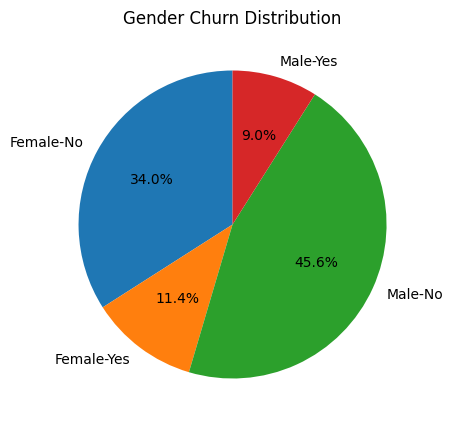

In [237]:
counts = df.groupby(['Gender', 'Churn']).size().reset_index(name='Counts')

labels = counts.apply(lambda x: f"{x['Gender']}-{x['Churn']}", axis=1)
sizes = counts['Counts'].values

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender Churn Distribution')
plt.show()

#### Encoding

In [238]:
def encode(series_df):
    if series_df.dtype == 'object':
        series_df = LabelEncoder().fit_transform(series_df)
    return series_df

df = df.apply(lambda x: encode(x))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [239]:
df.corr()['Churn'].sort_values(ascending=False)

Churn              1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Churn, dtype: float64

In [251]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


#### Standardization

In [240]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Churn', axis=1))


In [241]:
x = df_scaled
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [250]:
x_test

array([[-0.56419726,  0.30659057,  0.91241915, ..., -1.54776799,
        -1.03067011, -1.01381126],
       [-0.28483432, -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255,  0.8049205 ],
       [-0.51246338,  1.51506738, -1.09598752, ...,  0.64609167,
        -1.03067011, -0.72214659],
       ...,
       [-0.42968918, -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255,  0.90135294],
       [-0.72974567, -0.90188624,  0.91241915, ..., -1.54776799,
         0.97024255, -0.62732559],
       [-1.21604413,  0.30659057, -1.09598752, ..., -1.54776799,
        -1.03067011, -0.97792593]])

In [242]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

guassian = GaussianNB()
guassian.fit(x_train, y_train)

GaussianNB()

In [243]:
dtc_pred = dtc.predict(x_test)
rf_pred = rf.predict(x_test)
guassian_pred = guassian.predict(x_test)

print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, dtc_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, dtc_pred))
print('Classification report: \n', classification_report(y_test, dtc_pred))
print("\n\n\n")
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, rf_pred))
print('Classification report: \n', classification_report(y_test, rf_pred))
print("\n\n\n")
print('Gaussian Naive Bayes')
print('Accuracy:', accuracy_score(y_test, guassian_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, guassian_pred))
print('Classification report: \n', classification_report(y_test, guassian_pred))

Decision Tree Classifier
Accuracy: 0.7976666666666666
Confusion matrix: 
 [[2103  313]
 [ 294  290]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      2416
           1       0.48      0.50      0.49       584

    accuracy                           0.80      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.80      0.80      0.80      3000





Random Forest Classifier
Accuracy: 0.8683333333333333
Confusion matrix: 
 [[2341   75]
 [ 320  264]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000





Gaussian Naive Bayes
Accuracy: 0.8343333333333334
Confusion matrix: 
 [[2356   60]
 [ 

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

#Saving the model 

In [252]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

#Saving the scaler

In [249]:

with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make a prediction using the loaded model
prediction = loaded_model.predict(x_test)
print("Predictions:", prediction)
print("Actual:", y_test.values)



Predictions: [0 0 0 ... 0 0 0]
Actual: [0 0 0 ... 0 0 0]
